<a href="https://colab.research.google.com/github/mag381/AI/blob/main/03_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_blobs
from sklearn import cluster, preprocessing
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples


In [ ]:
#iris=load_iris()
#iris.data.shape
#iris.target_names
#df0 = pd.DataFrame(iris.data, columns=iris.feature_names)
#df0["target_names"]=iris.target

In [ ]:
#f_n='iris.csv'
#df0.to_csv(f_n, encoding='utf-8-sig')
#from google.colab import files # ダウンロード準備
#files.download(f_n)            # ダウンロード

In [ ]:
#csv形式のデータファイル読み込む
from google.colab import files   # PC上のファイルを選択して、
uploaded=files.upload()          # Colab上のに読み込んでいる（上の行とセットで）
f_name = list(uploaded.keys())[0] #選択したファイル名を f_nameに代入する
# iris.csv を読み込む

Saving iris.csv to iris.csv


In [ ]:
# 指定したファイルの中身をデータフレーム df0 に格納する
df0 = pd.read_csv(f_name,  encoding='utf-8-sig') 

In [ ]:
# データフレームの先頭5行を表示する
df0.head()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [ ]:
# 余計な列を2つ削除（drop）し、変数 df に格納
# target_names は花の種類。教師なし学習なので使わない
df00=df0
df=df0.drop(["Unnamed: 0","target_names"], axis=1) 
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# データの列別に総数、平均、標準変化・・・を表示
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


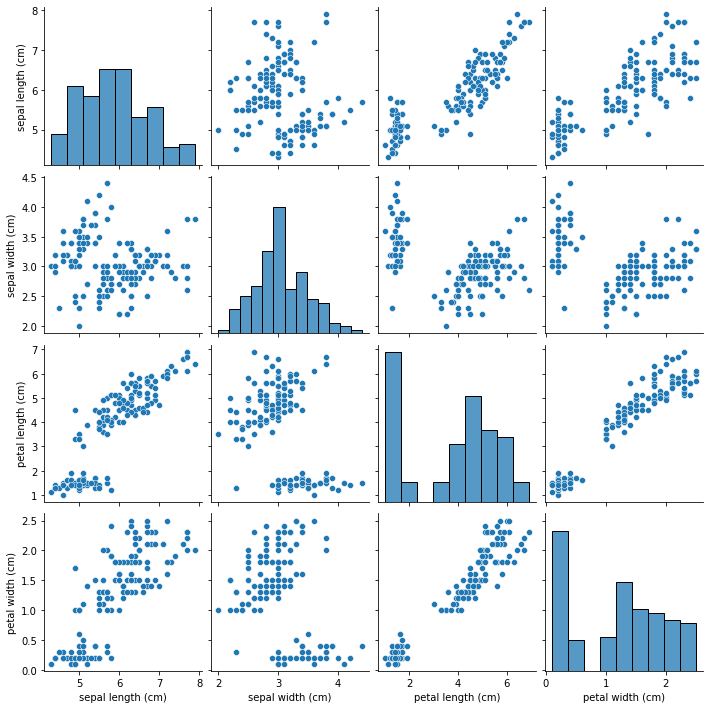

In [ ]:
# df1にコピーし、変数同士の関係を図で表示
# 一部、ヒストグラムを表示
df1=df.copy()
sns.pairplot(df1)

In [ ]:
# K-means法を実施
# グループ数3の条件にするため
# n_clusters=3 とし、モデル名を km3 とした
km3 =KMeans(n_clusters=3, random_state=0, init="random")
df2=df.copy()   # コピーしたもので
km3.fit(df2)  # モデル km3を学習させる

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3, random_state=0)

In [ ]:
# df2のデータを使って学習モデルで予測(predict)させ
# その結果を変数 yosoku に代入
yosoku=km3.predict(df2)
yosoku
# 予測した花の種類を数字 0,1,2 で表示している
# 数字は自動的に振り当て当てられるので、
# どの花と対応しているかはわからない

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

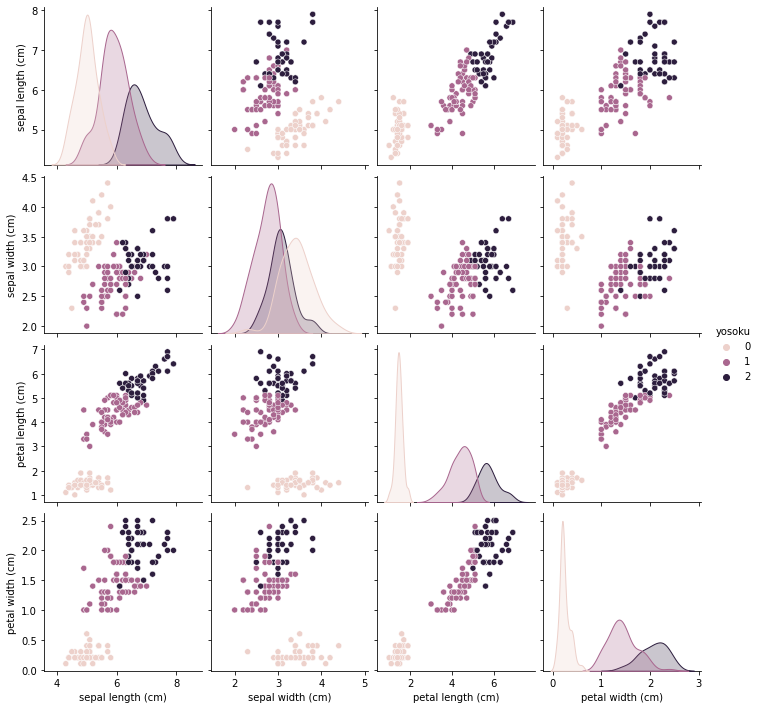

In [ ]:
# df2 に "yosoku" の列を追加し、
# 予測した値(0,1,2)を代入
df2["yosoku"]=yosoku
# yosoku の列に入った予測値の数値
# （0,1,2)に応じて色分けしてプロット
sns.pairplot(df2,hue="yosoku")

In [ ]:
# 予測値の中心位置を求め、データフレームに格納する
# cluster_centers_ はプログラムの名前（勝手に変えない）
yosoku_chusin=pd.DataFrame(km3.cluster_centers_)
# 予測中心の列名は、df2の列名からコピーする
# [:4] は 先頭から4個の意味
yosoku_chusin.columns=df2.columns[:4]
# 予測中心のデータフレームの内容を表示する
yosoku_chusin

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


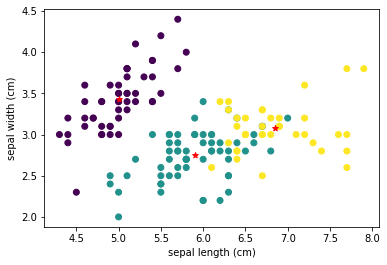

In [ ]:
# df2のデータを散布図に描く、yosoku の列に入っている
# 数値(0,1,2)に応じて色を使い分ける
plt.scatter(df2["sepal length (cm)"], 
            df2["sepal width (cm)"],
            c=df2["yosoku"])
# X軸（横軸）のラベルを指定
plt.xlabel("sepal length (cm)")
# Y軸（縦軸）のラベルを指定
plt.ylabel("sepal width (cm)")
# 各グループの中心点をプロット、マークは*、色は赤を指定）
plt.scatter(yosoku_chusin["sepal length (cm)"], 
            yosoku_chusin["sepal width (cm)"],
            marker="*", color="red")

In [ ]:
# df0の列 target_names の値を、df2の列 target にコピー
df2["target"]=df0["target_names"]
# 列 target の値、花の名前に置き換える
df2.loc[df2["target"] == 0, "target"] ="setosa"
df2.loc[df2["target"] == 1, "target"] ="versicolor"
df2.loc[df2["target"] == 2, "target"] ="virginica"
# 列 target の花の種類毎に、
# 各列の平均値を小数点以下3桁で表示
df2.groupby("target").mean().round(3)
# 予測が完全なら、yosoku に0,1,2 のどれかが入る


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),yosoku
target,,,,,
setosa,5.006,3.428,1.462,0.246,0.00
versicolor,5.936,2.770,4.260,1.326,1.04
virginica,6.588,2.974,5.552,2.026,1.72


In [ ]:
# ARI(Adjusted Rand Index) 調整ランド指数
# Accuracy（正解率）
ari = "ARI= {:2f}".format(adjusted_rand_score
                  (df0.target_names,df2["yosoku"]))
accuracy="Accuracy= {:2f}".format(accuracy_score
                  (df0.target_names,df2["yosoku"]))
print(ari)
print(accuracy)

ARI= 0.730238
Accuracy= 0.893333


In [ ]:
# 変な結果にならないように
# 初期の中心同志をバラけさせるため
# 初期条件を変更 init="k-means++"
# モデル名を km3p にした
km3p = KMeans(n_clusters=3, 
              random_state=0, 
              init="k-means++")
df2=df.copy()   # コピーしたもので
km3p.fit(df2)   # 学習(fit)させる
yosoku=km3p.predict(df2)
df2["yosoku"]=yosoku
# ARI(Adjusted Rand Index) 調整ランド指数
# Accuracy（正解率）
ari = "ARI= {:2f}".format(adjusted_rand_score
                  (df0.target_names,df2["yosoku"]))
accuracy="Accuracy= {:2f}".format(accuracy_score
                  (df0.target_names,df2["yosoku"]))
print(ari)
print(accuracy)
# ARI はあまり変わっていない
# 元々がよかったためか？
# accuracy が低下したのは、グループに自動的に
# 振り当てられる数字 0,1,2 が変わったため

ARI= 0.730238
Accuracy= 0.240000


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ARI= 0.539922
Accuracy= 0.646667


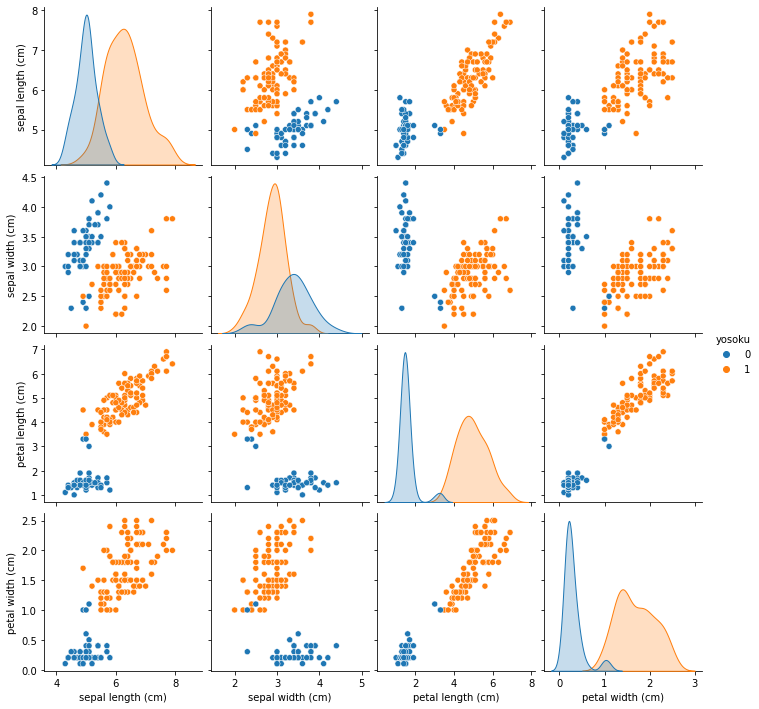

In [ ]:
# 分けるグループ数を2に指定するため
# n_clusters=2 に、モデル名をkm2 にした
km2 =KMeans(n_clusters=2, random_state=0)
df2=df.copy()
km2.fit(df2)
yosoku=km2.predict(df2)
df2["yosoku"]=yosoku
sns.pairplot(df2,hue="yosoku")
ari = "ARI= {:2f}".format(adjusted_rand_score
              (df0.target_names,df2["yosoku"]))
accuracy="Accuracy= {:2f}".format(accuracy_score
              (df0.target_names,df2["yosoku"]))
print(ari)
print(accuracy)
# 適切なグループ数ではなかったので
# ARIが0.73から0.54に低下した

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ARI= 0.649818
Accuracy= 0.213333


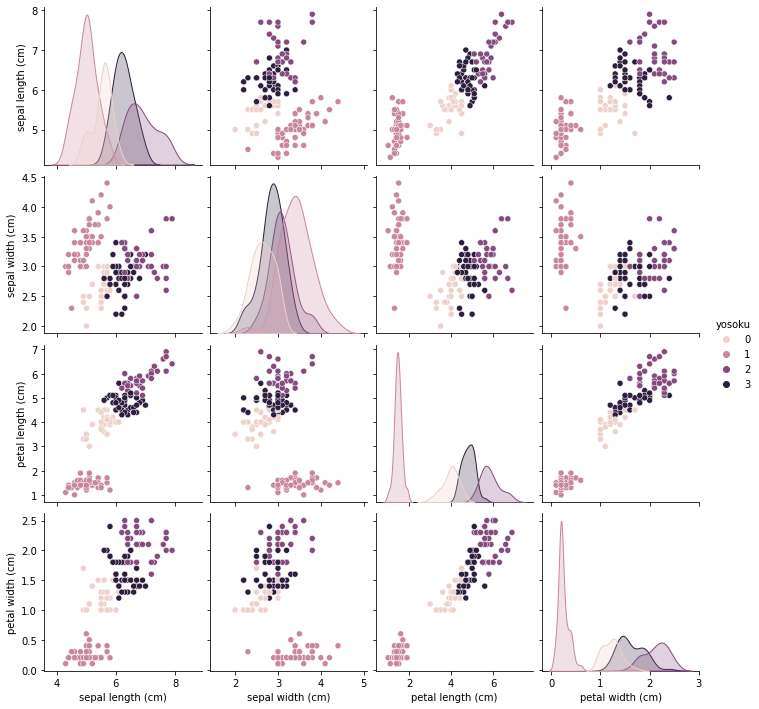

In [ ]:
# 分けるグループ数を4に指定するため
# n_clusters=4 に、モデル名をkm4 にした
km4 =KMeans(n_clusters=4, random_state=0)
df2=df.copy()
km4.fit(df2)
yosoku=km4.predict(df2)
df2["yosoku"]=yosoku
sns.pairplot(df2,hue="yosoku")
ari = "ARI= {:2f}".format(adjusted_rand_score
                (df0.target_names,df2["yosoku"]))
accuracy="Accuracy= {:2f}".format(accuracy_score
                (df0.target_names,df2["yosoku"]))
print(ari)
print(accuracy)
# グループ数4が不適切だったので
# ARI が グループ数3 での 0.73より下がった

k-means法で適切なグループ数（クラスター数）を決めるにはどうしたらよいか？<br>

In [ ]:
# iriデータから "target"を変数yに代入
# "sepal length (cm)","sepal width (cm)"をxに代入
df3=df.copy()
df3["target"]=df0["target_names"] 
df3.columns
y=df3["target"]
print(y)
x=df3.drop(["petal length (cm)","petal width (cm)","target"],axis=1)
print(x)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64
     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

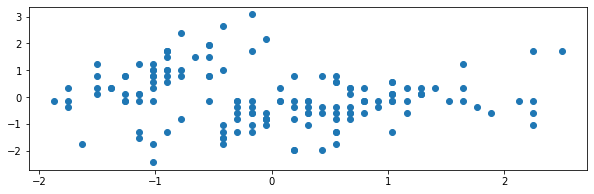

In [ ]:
# 変数xに対して標準化処理を実施
sca=preprocessing.StandardScaler()
x_norm=sca.fit_transform(x)
x1=x_norm[:,0]
y1=x_norm[:,1]
# 標準化処理した結果をプロット
plt.figure(figsize=(10,3))
plt.scatter(x1,y1)
plt.show

In [ ]:
# k-means法のクラスタ数を1～10まで計算し、
# dist に 各クラスタの inertia_ 属性を格納
# inertiaとは各クラスタ内の二乗誤差(SSE)のこと
# (Sum of Squared errors of prediction)
dist=[]
for i in range(1,11):
  km = KMeans(n_clusters=i, n_init=10, max_iter=300, random_state=0)
  km.fit(x)
  dist.append(km.inertia_)

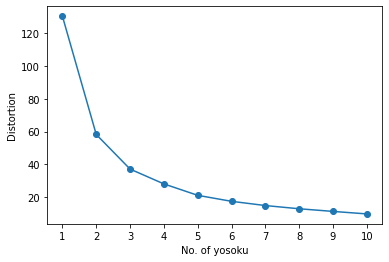

In [ ]:
# 変数distに貯えた二乗誤差(SSE)をプロット
plt.plot(range(1,11), dist, marker="o")
plt.xticks(range(1,11))
plt.xlabel("No. of yosoku")
plt.ylabel("Distortion")
plt.show()
# この図がエルボー（肘）にみえるのでエルボー法という
# 傾きが小さくなったところの横軸が最適な
# クラスター数とみなされる

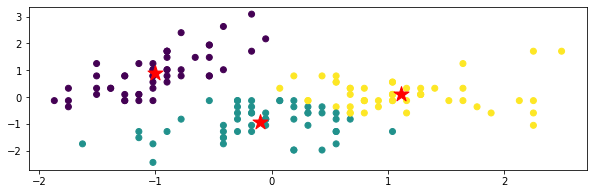

In [ ]:
# 上でやった4変数ではなく、今度は2変数なので
# 同じクラスタ数3でも、多少違う結果になる
km3 =KMeans(n_clusters=3, n_init=10, max_iter=300,random_state=0)
km3a=km3.fit(x_norm)
plt.figure(figsize=(10,3))
plt.scatter(x1,y1, c=km3a.labels_)
plt.scatter(km3a.cluster_centers_[:,0],km3a.cluster_centers_[:,1], s=250, marker="*",c="red")
plt.show()

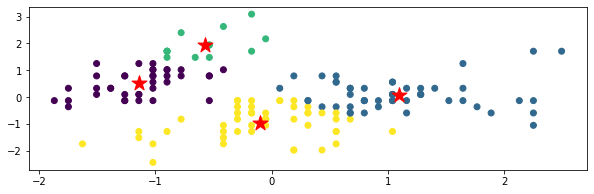

In [ ]:
# 試しにクラスタ数4でやってみる
km4 =KMeans(n_clusters=4, n_init=10, max_iter=300,random_state=0)
km4a=km4.fit(x_norm)
plt.figure(figsize=(10,3))
plt.scatter(x1,y1, c=km4a.labels_)
plt.scatter(km4a.cluster_centers_[:,0],km4a.cluster_centers_[:,1], s=250, marker="*",c="red")
plt.show()

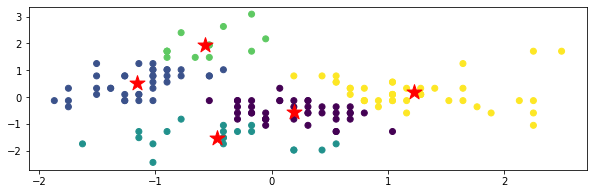

In [ ]:
# 試しにクラスタ数5でやってみる
km5 =KMeans(n_clusters=5, n_init=10,
        max_iter=300,random_state=0)
km5a=km5.fit(x_norm)
plt.figure(figsize=(10,3))
plt.scatter(x1,y1, c=km5a.labels_)
plt.scatter(km5a.cluster_centers_[:,0],
            km5a.cluster_centers_[:,1], 
            s=250, marker="*",c="red")
plt.show()
# エルボー法での差は結構微妙なので、
# クラスタ数を決めにくいかも

In [ ]:
# 代わりにシルエット分析をやってみる
# 先ほどの分割数3の結果を使う
lb=np.unique(km3a.labels_)
nclst=lb.shape[0]
sil=silhouette_samples(x,km3a.labels_)

49
52
49


([<matplotlib.axis.YTick at 0x7f7211fb8970>,
 [Text(0, 24.5, '1'), Text(0, 99.5, '2'), Text(0, 176.0, '3')])

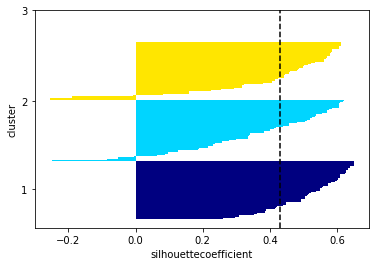

In [ ]:
ymin,ymax = 0,0
yt=[]

for i,c in enumerate(lb):
  c_sil = sil[km3a.labels_ == c]
  print(len(c_sil))
  c_sil.sort()
  ymax += len(c_sil)
  cl = cm.jet(float(i)/nclst)
  plt.barh(range(ymin,ymax),c_sil,height=1.0,edgecolor="none",color=cl)
  yt.append(ymin+ymax/2.)
  ymin += len(c_sil)

silav=np.mean(sil)
plt.axvline(silav,color="black",linestyle="--")
plt.ylabel("cluster")
plt.xlabel("silhouettecoefficient")
plt.yticks(yt,lb+1)
# 横軸のシルエット係数が1に近いほど、各クラスタが
# 
# クラスタ数が良好なら、シルエット厚みは均等になる
# クラスタ数3は比較的均等（図も、数字49,52,49も均等）
# マイナスは、間違ったクラスタに分類されていることを
# 示している

In [ ]:
# 代わりにシルエット分析をやってみる
# 先ほどの分割数4の結果を使う
lb=np.unique(km4a.labels_)
nclst=lb.shape[0]
sil=silhouette_samples(x,km4a.labels_)

37
50
13
50


([<matplotlib.axis.YTick at 0x7f7211e485b0>,
 [Text(0, 18.5, '1'),
  Text(0, 80.5, '2'),
  Text(0, 137.0, '3'),
  Text(0, 175.0, '4')])

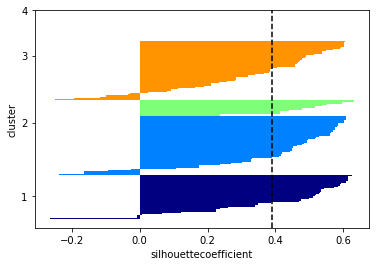

In [ ]:
ymin,ymax = 0,0
yt=[]

for i,c in enumerate(lb):
  c_sil = sil[km4a.labels_ == c]
  print(len(c_sil))
  c_sil.sort()
  ymax += len(c_sil)
  cl = cm.jet(float(i)/nclst)
  plt.barh(range(ymin,ymax),c_sil,height=1.0,edgecolor="none",color=cl)
  yt.append(ymin+ymax/2.)
  ymin += len(c_sil)

silav=np.mean(sil)
plt.axvline(silav,color="black",linestyle="--")
plt.ylabel("cluster")
plt.xlabel("silhouettecoefficient")
plt.yticks(yt,lb+1)
# クラスタ数が良好なら、シルエット厚みは均等になる
# クラスタ数4はあまり均等ではない

In [ ]:
# 代わりにシルエット分析をやってみる
# 先ほどの分割数5の結果を使う
lb=np.unique(km5a.labels_)
nclst=lb.shape[0]
sil=silhouette_samples(x,km5a.labels_)

41
36
19
13
41


([<matplotlib.axis.YTick at 0x7f7211ccc850>,
 [Text(0, 20.5, '1'),
  Text(0, 79.5, '2'),
  Text(0, 125.0, '3'),
  Text(0, 150.5, '4'),
  Text(0, 184.0, '5')])

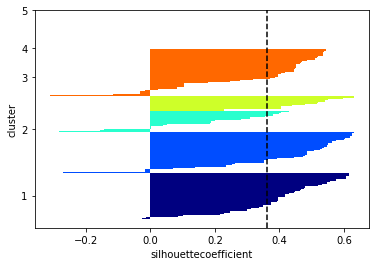

In [ ]:
ymin,ymax = 0,0
yt=[]

for i,c in enumerate(lb):
  c_sil = sil[km5a.labels_ == c]
  print(len(c_sil))
  c_sil.sort()
  ymax += len(c_sil)
  cl = cm.jet(float(i)/nclst)
  plt.barh(range(ymin,ymax),c_sil,height=1.0,edgecolor="none",color=cl)
  yt.append(ymin+ymax/2.)
  ymin += len(c_sil)

silav=np.mean(sil)
plt.axvline(silav,color="black",linestyle="--")
plt.ylabel("cluster")
plt.xlabel("silhouettecoefficient")
plt.yticks(yt,lb+1)
# クラスタ数5もいまいちなので、
# クラスタ数3がよさそう